In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print ("%.0f" % ndvi[0][0])

-340282346638528859811704183484516925440


In [ ]:
from osgeo import gdal

def ler_img(nome):

  path = ('/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/' + nome + '.tif')
  print(path)
  dataSource = gdal.Open(path)
  nome = dataSource.GetRasterBand(1)
  nome = nome.ReadAsArray()
  return nome

B1 = ler_img('B1')
B2 = ler_img('B2')
B3 = ler_img('B3')
B4 = ler_img('B4')
B5 = ler_img('B5')
B6 = ler_img('B6')
B7 = ler_img('B7')
ndvi  = ler_img('ndvi')
ndbi  = ler_img('ndbi')
ndbi2  = ler_img('ndbi2')
BLFEI = ler_img('BLFEI')
ndwi  = ler_img('ndwi')
termal  = ler_img('TRAD')

/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B1.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B2.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B3.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B4.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B5.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B6.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/B7.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/ndvi.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/ndbi.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/ndbi2.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/BLFEI.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/ndwi.tif
/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/TRAD.tif


In [ ]:
#torcando os NODATAVALUE zero para -1
import numpy as np

def val(img):
  img = img.astype('int16')
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] == 0:
        img[i][j]= -1

  return img

B1 = val(B1)
B2 = val(B2)
B3 = val(B3)
B4 = val(B4)
B5 = val(B5)
B6 = val(B6)
B7 = val(B7)

In [ ]:
def val(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] == -340282346638528859811704183484516925440:
        img[i][j]= -1
  return img


ndvi  = val(ndvi)
ndbi  = val(ndbi)
ndbi2  = val(ndbi2)
BLFEI = val(BLFEI)
termal  = val(termal)

In [ ]:
import pandas as pd
data = np.loadtxt('/content/gdrive/My Drive/Mestrado/classificaRF/ano2015/pts_treino2015.csv', delimiter=';', skiprows=1)
data = data.astype(int)
data = data.astype(np.float64)

array_treino = np.zeros((data.shape[0],16), dtype=np.float64)
i=0
for i in range(data.shape[0]):
  array_treino[i] = data[i,0], data[i,2], data[i,1], B1[int(data[i,2]),int(data[i,1])], B2[int(data[i,2]),int(data[i,1])], B3[int(data[i,2]),int(data[i,1])], B4[int(data[i,2]),int(data[i,1])], B5[int(data[i,2]),int(data[i,1])], B6[int(data[i,2]),int(data[i,1])], B7[int(data[i,2]),int(data[i,1])], ndvi[int(data[i,2]),int(data[i,1])], ndbi[int(data[i,2]),int(data[i,1])], ndbi2[int(data[i,2]),int(data[i,1])], BLFEI[int(data[i,2]),int(data[i,1])], ndwi[int(data[i,2]),int(data[i,1])], termal[int(data[i,2]),int(data[i,1])]

pd.DataFrame(array_treino).to_csv('array_treino.csv', index_label = "Index", header  = ['classe','linha','coluna', 'B1',
                                                                'B2', 'B3', 'B4','B5', 'B6', 'B7', 'ndvi' ,'ndbi' , 'ndbi2', 'BLFEI', 'ndwi', 'termal'])

In [ ]:
data = pd.read_csv("./array_treino.csv")
data

,Index,classe,linha,coluna,B1,B2,B3,B4,B5,B6,B7,ndvi,ndbi,ndbi2,BLFEI,ndwi,termal
0,0,4.0,902.0,411.0,8979.0,9263.0,10673.0,14299.0,16342.0,22416.0,16524.0,0.066675,0.156716,0.005538,-0.236813,-0.354891,8674.0
1,1,4.0,901.0,412.0,8739.0,9017.0,10496.0,13619.0,16687.0,20419.0,14651.0,0.101234,0.100577,-0.064969,-0.224858,-0.320977,8628.0
2,2,4.0,902.0,412.0,8929.0,9206.0,10917.0,15216.0,17251.0,23007.0,15958.0,0.062679,0.142978,-0.038935,-0.242368,-0.356385,8648.0
3,3,4.0,903.0,412.0,8957.0,9209.0,11003.0,15003.0,17273.0,23717.0,16639.0,0.070331,0.157209,-0.018695,-0.250501,-0.366187,8663.0
4,4,4.0,904.0,412.0,8896.0,9225.0,10826.0,14686.0,17108.0,23454.0,16532.0,0.076178,0.156452,-0.017122,-0.251926,-0.368378,8681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25432,25432,1.0,959.0,743.0,9523.0,10111.0,11746.0,13405.0,16366.0,18419.0,16514.0,0.099459,0.059020,0.004501,-0.140236,-0.221217,9070.0
25433,25433,1.0,960.0,743.0,8734.0,9597.0,11435.0,12154.0,15667.0,17031.0,15934.0,0.126272,0.041715,0.008449,-0.127682,-0.196585,9095.0
25434,25434,1.0,961.0,743.0,9560.0,10459.0,11567.0,12713.0,15265.0,17507.0,16035.0,0.091215,0.068412,0.024601,-0.131479,-0.204306,9114.0
25435,25435,1.0,959.0,744.0,9792.0,10790.0,11931.0,12378.0,15814.0,18642.0,17179.0,0.121879,0.082076,0.041372,-0.148213,-0.219507,9062.0


0.22041983953441524
Populating the interactive namespace from numpy and matplotlib


<BarContainer object of 13 artists>

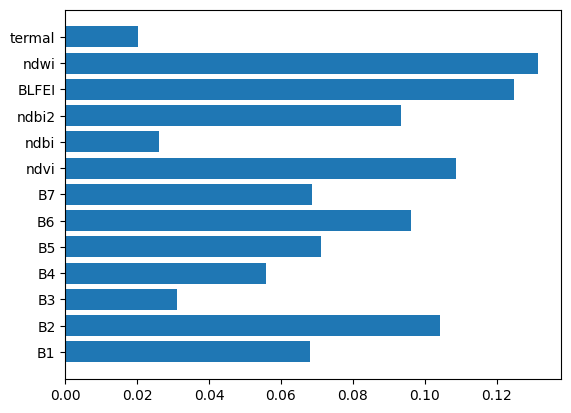

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np

data = pd.read_csv("./array_treino.csv")
#data.head()

X = data.drop(["Index","classe", "linha", "coluna"], axis=1)
y = data['classe']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.25, random_state=0)
#n_jobs = -1 usa todos os threads do PC
arvores = RandomForestClassifier(n_estimators=10000, max_depth=10, random_state=0, n_jobs=-1)
arvores.fit(Xtr, ytr)
p = arvores.predict(Xval)

print(np.sqrt(mean_squared_error(yval, p)))

%pylab inline
plt.barh(list(X.columns), arvores.feature_importances_)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(yval, p)
confusion

array([[2302,    9,    0,    8],
       [   6, 1582,    0,    6],
       [   0,    1, 2189,    0],
       [  21,    2,    0,  234]])

Populating the interactive namespace from numpy and matplotlib
ROC AUC Score : 0.9994511292987744


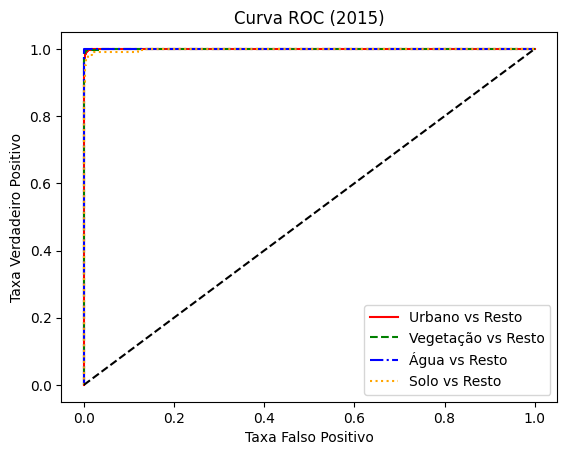

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
%pylab inline
y_pred_prob = arvores.predict_proba(Xval)

roc_auc = roc_auc_score(yval, y_pred_prob, multi_class='ovr')
print('ROC AUC Score :',roc_auc)
fpr, tpr, thresh = roc_curve(yval, y_pred_prob[:,0], pos_label=1)
plt.plot(fpr, tpr, linestyle='solid',color='red', label='Urbano'+' vs Resto')
fpr, tpr, thresh = roc_curve(yval, y_pred_prob[:,1], pos_label=2)
plt.plot(fpr, tpr, linestyle='dashed',color='green', label='Vegetação'+' vs Resto')
fpr, tpr, thresh = roc_curve(yval, y_pred_prob[:,2], pos_label=3)
plt.plot(fpr, tpr, linestyle='dashdot',color='blue', label='Água'+' vs Resto')
fpr, tpr, thresh = roc_curve(yval, y_pred_prob[:,3], pos_label=4)
plt.plot(fpr, tpr, linestyle='dotted',color='orange', label='Solo'+' vs Resto')

# Plot the ROC curve
plt.plot(label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC (2015)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tabela = np.zeros((3270666,15), dtype=np.float64)
k = 0
for i in range(B1.shape[0]):
  for j in range(B1.shape[1]):
    tabela[k] = B1[i][j], B2[i][j], B3[i][j], B4[i][j], B5[i][j], B6[i][j], B7[i][j], ndvi[i][j], ndbi[i][j], ndbi2[i][j], BLFEI[i][j], ndwi[i][j], termal[i][j], i, j
    k += 1

tab_for = np.zeros((1854904, 15), dtype=np.float64)

j= 0
for i in range(3270666):
  if int(tabela[i][0]) != -1:
    tab_for[j] = tabela[i]
    j += 1

pd.DataFrame(tab_for).to_csv('tab_for.csv', index_label = "Index", header  = ['B1','B2', 'B3', 'B4','B5', 'B6', 'B7','ndvi' ,'ndbi','ndbi2', 'BLFEI' ,'ndwi', 'termal', 'linha','coluna'])

In [ ]:
data = pd.read_csv("./tab_for.csv")
data

,Index,B1,B2,B3,B4,B5,B6,B7,ndvi,ndbi,ndbi2,BLFEI,ndwi,termal,linha,coluna
0,0,7767.0,7903.0,8606.0,8276.0,16546.0,12045.0,9798.0,0.333172,-0.157427,-0.256149,-0.150521,-0.166529,8513.0,0.0,396.0
1,1,7723.0,7875.0,8594.0,8177.0,15562.0,11791.0,9614.0,0.311091,-0.137864,-0.236257,-0.145536,-0.156831,8501.0,0.0,397.0
2,2,7685.0,7811.0,8507.0,8076.0,14990.0,11601.0,9569.0,0.299749,-0.127449,-0.220734,-0.141924,-0.153869,8487.0,0.0,398.0
3,3,7775.0,7848.0,8624.0,8240.0,15569.0,12492.0,10048.0,0.307825,-0.109654,-0.215521,-0.164068,-0.183179,8514.0,1.0,394.0
4,4,7759.0,7945.0,8641.0,8325.0,16319.0,12255.0,9755.0,0.324379,-0.142227,-0.251745,-0.158208,-0.172952,8492.0,1.0,395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854899,1854899,7391.0,7531.0,8092.0,7805.0,15874.0,11218.0,8958.0,0.340766,-0.171859,-0.278512,-0.150387,-0.161885,8454.0,1804.0,1423.0
1854900,1854900,7533.0,7734.0,8312.0,8098.0,13624.0,11215.0,8999.0,0.254396,-0.096985,-0.204438,-0.139466,-0.148666,8471.0,1804.0,1424.0
1854901,1854901,7440.0,7609.0,8212.0,7906.0,14508.0,10375.0,8664.0,0.294548,-0.166097,-0.252201,-0.113456,-0.116372,8486.0,1804.0,1425.0
1854902,1854902,7572.0,7646.0,8191.0,7900.0,15964.0,10760.0,8609.0,0.337915,-0.194731,-0.299312,-0.133029,-0.135560,8451.0,1805.0,1422.0


In [ ]:
k=0
for i in range(3270666):
   if int(tabela[i][0]) != -1:
     k += 1
print(k)

1854904


In [ ]:
data = pd.read_csv("./tab_for.csv")
X = data.drop(["Index", "linha", "coluna"], axis=1)
p = arvores.predict(X)

Populating the interactive namespace from numpy and matplotlib


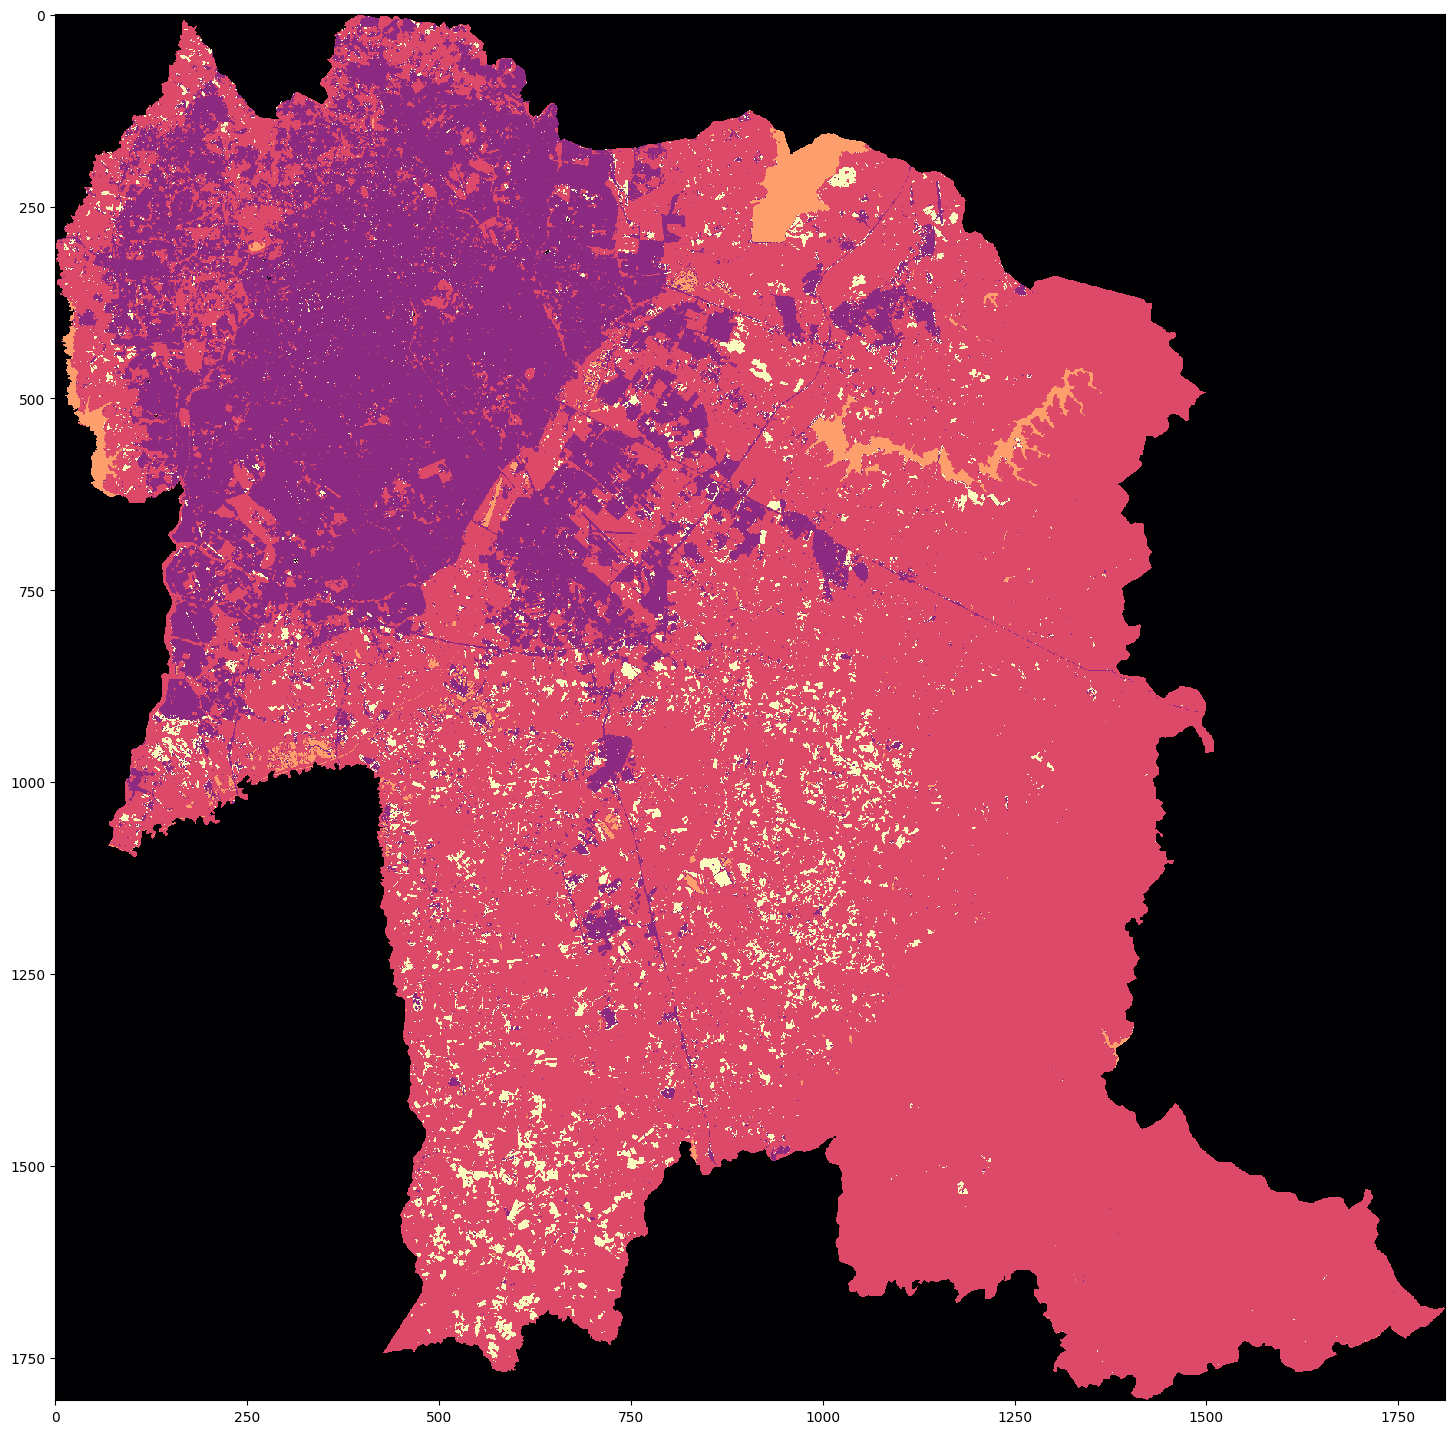

In [ ]:
a = data.to_numpy()
c = np.transpose(p)
b = np.column_stack((a, c))

tab_com_p = pd.DataFrame(b, columns =  ['Index','B1','B2', 'B3', 'B4','B5','B6', 'B7','ndvi' ,'ndbi','ndbi2' ,'BLFEI', 'ndwi', 'termal', 'linha','coluna', 'p'])

path = '/content/gdrive/My Drive/Mestrado/classificaRF/ano2010/B1.tif'
dataSource = gdal.Open(path)
array_novo = np.zeros((dataSource.RasterYSize, dataSource.RasterXSize), dtype=np.float64)

for i in range(tab_com_p.shape[0]):
  array_novo[int(tab_com_p.iloc[i][14])][int(tab_com_p.iloc[i][15])] = tab_com_p.iloc[i][16]

#colocando valores -1 (no data value):
for i in range(array_novo.shape[0]):
  for j in range(array_novo.shape[1]):
    if B1[i][j]== -1:
      array_novo[i][j]= -1

%pylab inline

plt.figure(figsize=(18, 18))
plt.imshow(array_novo , cmap='magma', interpolation='nearest')
plt.show()

In [ ]:
driverTiff = gdal.GetDriverByName('GTiff')

segments_ds = driverTiff.Create('classifica2015.tif', dataSource.RasterXSize, dataSource.RasterYSize,
                                1, gdal.GDT_Float32)
segments_ds.SetGeoTransform(dataSource.GetGeoTransform())
segments_ds.SetProjection(dataSource.GetProjectionRef())
segments_ds.GetRasterBand(1).WriteArray(array_novo)
segments_ds = None

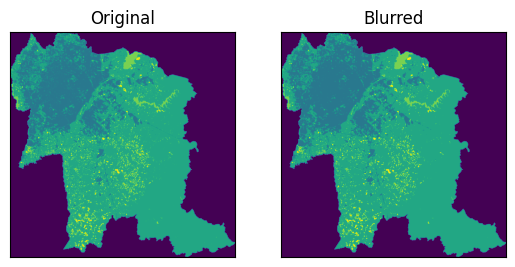

In [ ]:
from osgeo import gdal
path = ('./classifica2015.tif')
dataSource = gdal.Open(path)
img = dataSource.GetRasterBand(1)
img = img.ReadAsArray()

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

median = cv.medianBlur(img,3)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from osgeo import gdal
path = ('/content/gdrive/My Drive/Mestrado/classificaRF/ano2000/ruas2000.tif')
dataSource = gdal.Open(path)
ruas = dataSource.GetRasterBand(1)
ruas = ruas.ReadAsArray()

for i in range(median.shape[0]):
  for j in range(median.shape[1]):
    if ruas[i][j] == 1:
      median[i][j] = 1

In [ ]:
driverTiff = gdal.GetDriverByName('GTiff')

segments_ds = driverTiff.Create('classifica2015filtrado.tif', dataSource.RasterXSize, dataSource.RasterYSize,
                                1, gdal.GDT_Float32)
segments_ds.SetGeoTransform(dataSource.GetGeoTransform())
segments_ds.SetProjection(dataSource.GetProjectionRef())
segments_ds.GetRasterBand(1).WriteArray(median)
segments_ds = None